In [151]:
# Data Analysis and Preprocessing

In [152]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
# Load the datasets
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_data = pd.read_csv('../data/raw/IpAddress_to_Country.csv')
creditcard_data = pd.read_csv('../data/raw/creditcard.csv')

In [154]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [155]:
ip_data

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [156]:
creditcard_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [157]:
# Handle Missing Values

In [158]:
# Check for missing values in fraud_data
print("Missing Values in Fraud Data:")
print(fraud_data.isnull().sum())

# Check for missing values in ip_data
print("\nMissing Values in IP Address Data:")
print(ip_data.isnull().sum())

# Check for missing values in creditcard_data
print("\nMissing Values in Credit Card Data:")
print(creditcard_data.isnull().sum())

# drop rows with missing values
fraud_data = fraud_data.dropna()
ip_data = ip_data.dropna()
creditcard_data = creditcard_data.dropna()


Missing Values in Fraud Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing Values in IP Address Data:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

Missing Values in Credit Card Data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [159]:
# Data Cleaning

In [160]:
# Remove duplicates
fraud_data = fraud_data.drop_duplicates()
ip_data = ip_data.drop_duplicates()
creditcard_data = creditcard_data.drop_duplicates()

# Convert data types if necessary
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['user_id'] = fraud_data['user_id'].astype(str)
fraud_data['device_id'] = fraud_data['device_id'].astype(str)
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)

# Convert IP address columns to integers
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(int)

creditcard_data['Time'] = creditcard_data['Time'].astype(float)
creditcard_data['Amount'] = creditcard_data['Amount'].astype(float)


In [161]:
# Exploratory Data Analysis (EDA)

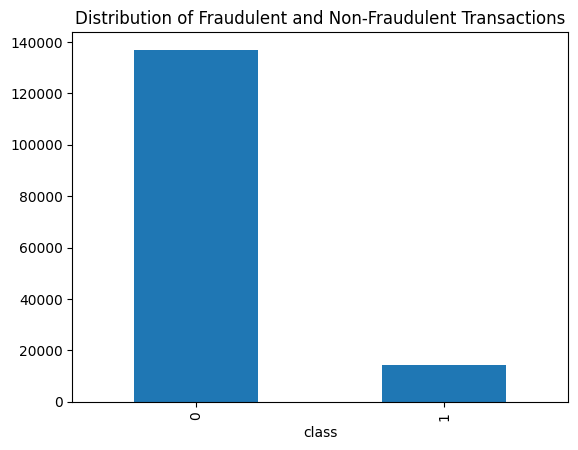

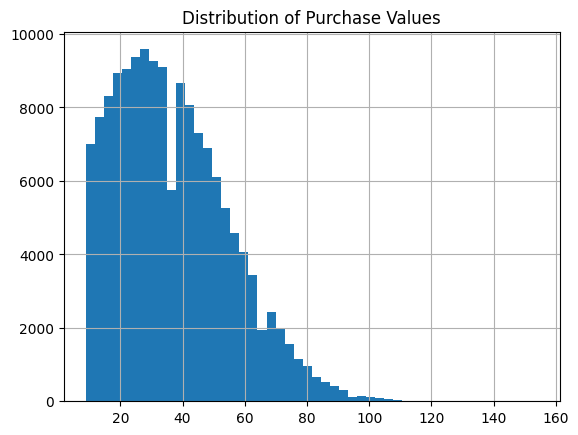

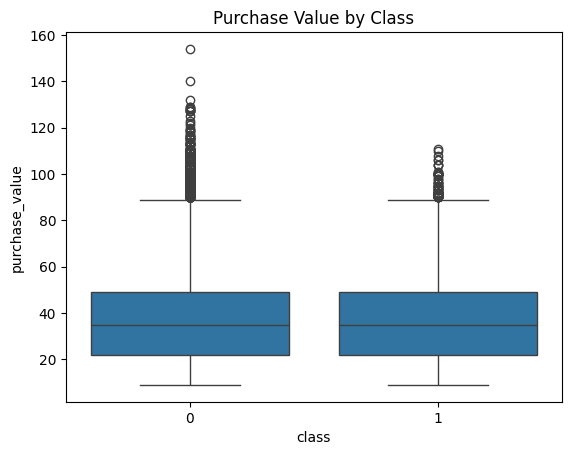

In [162]:
# Univariate analysis
fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

# Plot the distribution of purchase values
fraud_data['purchase_value'].hist(bins=50)
plt.title('Distribution of Purchase Values')
plt.show()

# Bivariate analysis
# Relationship between purchase_value and class in Fraud_Data.csv
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Class')
plt.show()


In [163]:
# Merge Datasets for Geolocation Analysis

In [164]:
# Convert IP addresses to string and handle missing values
fraud_data['ip_address'] = fraud_data['ip_address'].fillna('0.0.0.0').astype(str)

# Convert IP addresses in fraud_data to integer format
def ip_to_int(ip):
    try:
        return int(''.join([f'{int(i):08b}' for i in ip.split('.')]), 2)
    except ValueError:
        return 0  # Default value for malformed IPs

fraud_data['ip_address'] = fraud_data['ip_address'].apply(ip_to_int)

# Sort ip_data for binary search
ip_data = ip_data.sort_values(by='lower_bound_ip_address')

# Define function to map IP address to country using binary search
def ip_to_country(ip):
    left = 0
    right = len(ip_data) - 1
    while left <= right:
        mid = (left + right) // 2
        if ip_data.iloc[mid]['lower_bound_ip_address'] <= ip <= ip_data.iloc[mid]['upper_bound_ip_address']:
            return ip_data.iloc[mid]['country']
        elif ip < ip_data.iloc[mid]['lower_bound_ip_address']:
            right = mid - 1
        else:
            left = mid + 1
    return 'Unknown'

# Apply function to get country for each IP address
fraud_data['country'] = fraud_data['ip_address'].apply(ip_to_country)

# Verify the first few rows of the updated fraud_data
print(fraud_data.head())

  user_id         signup_time       purchase_time  purchase_value  \
0   22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1  333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2    1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3  150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4  221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age       ip_address  class  country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   96044104890468      0  Unknown  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  367328113800820      0  Unknown  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53   42950227077975      1  Unknown  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  503387579180292      0  Unknown  
4  NAUITBZFJKHWW    Ads  Safari   M   45  217885241698408      0  Unknown  


In [165]:
# Feature Engineering

In [167]:
# Transaction frequency and velocity
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()
fraud_data['transaction_velocity'] = fraud_data['purchase_value'] / fraud_data['time_since_signup']
fraud_data['transaction_time_diff'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()

# Extract hour of the day and day of the week from purchase_time
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

In [ ]:
# Encode categorical features
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'sex', 'country'], drop_first=True)

In [ ]:
# Normalization and Scaling

In [ ]:
# Normalize and scale the numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['purchase_value','transaction_count', 'age', 'transaction_time_diff','transaction_velocity', 'hour_of_day', 'day_of_week']
fraud_data[numerical_features] = scaler.fit_transform(fraud_data[numerical_features])
print(fraud_data[numerical_features])


        purchase_value  transaction_count       age  transaction_time_diff  \
0            -0.160204                0.0  0.679914              -0.136057   
1            -1.142592                0.0  2.304476              -1.571877   
2            -1.197169                0.0  2.304476              -1.577617   
3             0.385567                0.0  0.911994              -1.420213   
4             0.112681                0.0  1.376155              -0.182509   
...                ...                ...       ...                    ...   
151107        0.330990                0.0 -0.596528               0.105303   
151108       -0.105627                0.0 -0.132367              -1.279730   
151109        0.167258                0.0 -0.828608               0.559643   
151110        0.494721                0.0  0.447833               0.068481   
151111       -0.924284                0.0  0.563874              -0.450231   

        transaction_velocity  hour_of_day  day_of_week  
0     